Getting the Data

In [64]:
import pandas as pd
import numpy as np 

movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
tags = pd.read_csv('data/tags.csv')

print('Done')

Done


In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [67]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [69]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [70]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Joining Datasets

In [71]:
df = pd.merge(ratings, movies, on="movieId")

df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [72]:
print(df.info())
print(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB
None
          userId    movieId     rating     timestamp
count  100836.00  100836.00  100836.00  1.008360e+05
mean      326.13   19435.30       3.50  1.205946e+09
std       182.62   35530.99       1.04  2.162610e+08
min         1.00       1.00       0.50  8.281246e+08
25%       177.00    1199.00       3.00  1.019124e+09
50%       325.00    2991.00       3.50  1.186087e+09
75%       477.00    8122.00       4.00  1.435994e+09
max       610.00  193609.00       5.00  1.537799e+09


In [73]:
EDA

NameError: name 'EDA' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

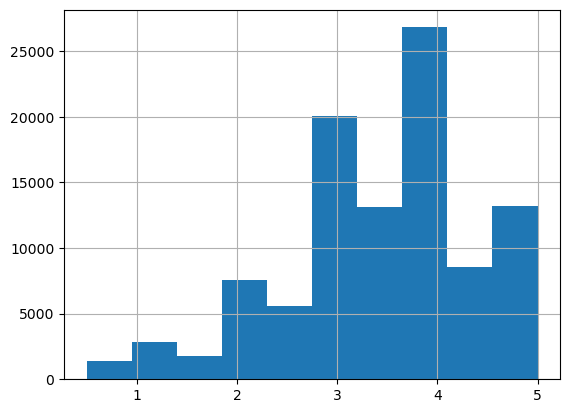

In [ ]:
df['rating'].hist()

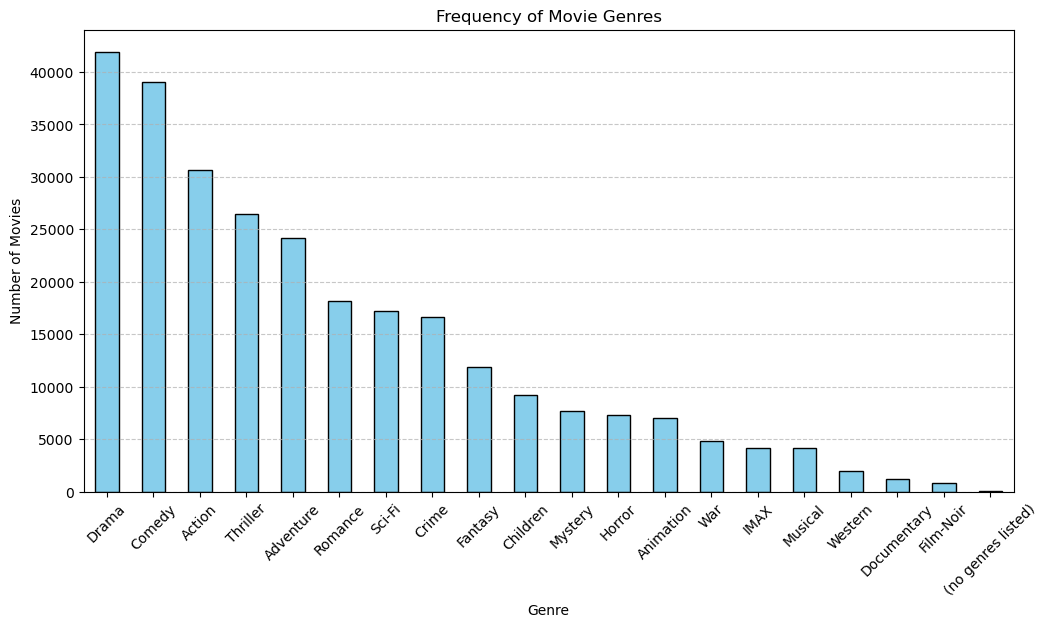

Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
dtype: int64


In [ ]:
genres = df['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)

genres.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title("Frequency of Movie Genres")
plt.ylabel("Number of Movies")
plt.xlabel("Genre")
plt.xticks(rotation=45) # Rotates the names so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(genres)

Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer

X = df[['genres']]
y = df[['rating']]

X_train, X_test , y_train , y_test = train_test_split(X,y,
                                                      test_size=0.2, 
                                                      random_state=42)
                                            
genre_pipeline = Pipeline([
    ('count_vec', 
    CountVectorizer(tokenizer= lambda x: x.split('|'),
    token_pattern=None))
])  

preprocessing = ColumnTransformer([
    ("genre_features", genre_pipeline, "genres")
]) 


X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.transform(X_test)

feature_names = preprocessing.get_feature_names_out()

print(f"Number of genres found: {len(feature_names)}")
print("Genres:", feature_names)
print(f"Shape of prepared training data: {X_train_prepared.shape}")


Number of genres found: 20
Genres: ['genre_features__(no genres listed)' 'genre_features__action'
 'genre_features__adventure' 'genre_features__animation'
 'genre_features__children' 'genre_features__comedy'
 'genre_features__crime' 'genre_features__documentary'
 'genre_features__drama' 'genre_features__fantasy'
 'genre_features__film-noir' 'genre_features__horror'
 'genre_features__imax' 'genre_features__musical'
 'genre_features__mystery' 'genre_features__romance'
 'genre_features__sci-fi' 'genre_features__thriller' 'genre_features__war'
 'genre_features__western']
Shape of prepared training data: (80668, 20)


Trainning

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, y_train)

predictions =  lin_reg.predict(X_train_prepared)

print( "Linear Regression RMSE : ", root_mean_squared_error(y_train, predictions))

coeff = pd.DataFrame(lin_reg.coef_.flatten(),
                    columns = ["weight"],
                    index = feature_names 
)
print("\n",coeff.sort_values(by="weight", ascending=False))

Linear Regression RMSE :  1.0207209661992713

                                       weight
genre_features__documentary         0.367159
genre_features__animation           0.336341
genre_features__war                 0.268249
genre_features__film-noir           0.234984
genre_features__crime               0.215189
genre_features__drama               0.193660
genre_features__mystery             0.112288
genre_features__western             0.111350
genre_features__adventure           0.105308
genre_features__imax                0.097466
genre_features__musical             0.082919
genre_features__fantasy             0.041066
genre_features__sci-fi              0.034692
genre_features__romance             0.022318
genre_features__(no genres listed) -0.021759
genre_features__thriller           -0.046830
genre_features__action             -0.121911
genre_features__comedy             -0.127224
genre_features__horror             -0.182671
genre_features__children           -0.268603


Learning Curves

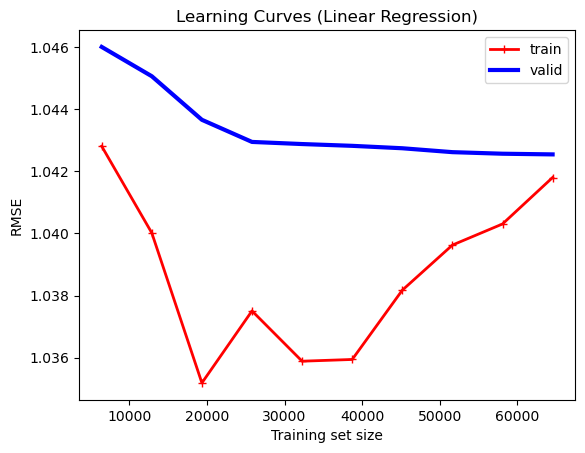

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes , train_scores , valid_scores = learning_curve(
    LinearRegression(), X_train_prepared , y_train,
    train_sizes = np.linspace(0.1,1,10),
    cv = 5,
    scoring='neg_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Learning Curves (Linear Regression)")
plt.show()

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=41)

ridge_reg.fit(X_train_prepared , y_train)

ridge_pred = ridge_reg.predict(X_train_prepared)

ridge_rmse = root_mean_squared_error(y_train, ridge_pred)

print("Ridge Regression RMSE: ", ridge_rmse)

Ridge Regression RMSE:  1.0207245241229463


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lass_reg = Lasso(alpha = 1)
lass_reg.fit(X_train_prepared,y_train)

lass_pred = lass_reg.predict(X_train_prepared)

lasso_rmse = root_mean_squared_error(lass_pred,y_train)
print("Lasso regression RMSE : ", lasso_rmse)

Lasso regression RMSE :  1.0409394885218026


Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elas_net = ElasticNet(alpha = 0.01, l1_ratio= 0.1)
elas_net.fit(X_train_prepared,y_train)

elas_pred = elas_net.predict(X_train_prepared)

elas_rmse = root_mean_squared_error(elas_pred,y_train)
print("ElasticNet RMSE : ",elas_rmse)

ElasticNet RMSE :  1.0217631859817666


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'alpha' : [0.01,0.1,1,10,100],
        'l1_ratio' : [0.1,0.5,0.7,0.9,0.95,0.99,1]
    }
]

grid_search = GridSearchCV(
    elas_net,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
)

grid_search.fit(X_train_prepared,y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Grid Search for ElasticNet.")
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Grid Search for ElasticNet.
Best alpha: 0.01
Best l1_ratio: 0.1


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'alpha' : loguniform(1e-4,1e3)
}

rnd_search = RandomizedSearchCV(
    ridge_reg,
    param_distributions=param_dist,
    n_iter = 100,
    cv = 5,
    scoring='neg_mean_squared_error',
    random_state=42,
)

rnd_search.fit(X_train_prepared, y_train)

print("Best alpha found: ", round(float(rnd_search.best_params_['alpha']),2))

Best alpha found:  41.25


Conclusion: 
A Linear Regression model using only genres is a Baseline Model. It’s like a weather app that only tells you the season (e.g., "It's Summer") but can't tell you the temperature for today. It is useful as a starting point, but not for a final product.

Evaluation on the test set

In [104]:
X_test_prepared = preprocessing.transform(X_test)

final_pred = lin_reg.predict(X_test_prepared)

final_rmse = root_mean_squared_error(y_test, final_pred)
print("Final RMSE: ",round(final_rmse, 3))

Final RMSE:  1.026
